In [58]:
import pandas as pd

In [59]:
data = {
'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny',
'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild',
'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High',
'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak',
'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [60]:
df = pd.DataFrame(data)

In [61]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [63]:
#Encode 
df_encoded = df.copy()
label_encoder = {}
for column in df.columns:
    if df [column].dtype == "object":
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])
        label_encoder[column] = le

#Feature and target
X = df_encoded.drop("PlayTennis", axis = 1)
y = df_encoded["PlayTennis"]

#train decision tree 

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

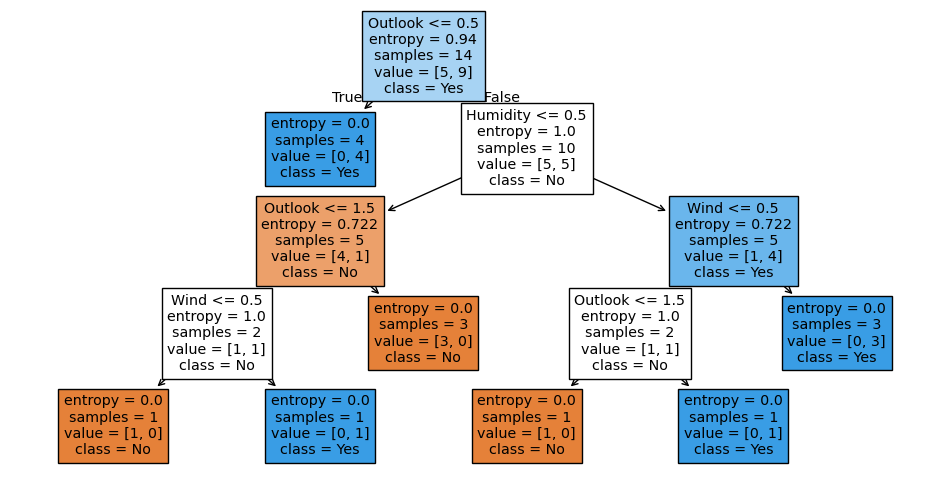

In [64]:
#Visualization with Matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plot_tree(model, feature_names = X.columns, class_names = label_encoder["PlayTennis"].classes_, filled= True)
plt.show()

In [69]:
#Testing

import streamlit as st

In [71]:
st.title("PlayTennis Prediction with ID3 Decision Tree")

2025-07-28 12:03:34.828 
  command:

    streamlit run C:\Users\HP\Downloads\New folder\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [75]:
# User input
st.sidebar.header("Input Weather Conditions")
def user_input():
    outlook = st.sidebar.selectbox("Outlook", df['Outlook'].unique())
    temp = st.sidebar.selectbox("Temperature", df['Temperature'].unique())
    humidity = st.sidebar.selectbox("Humidity", df['Humidity'].unique())
    wind = st.sidebar.selectbox("Wind", df['Wind'].unique())
    return pd.DataFrame([[outlook, temp, humidity, wind]],
        columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
input_df = user_input()

2025-07-28 12:04:26.878 Session state does not function when running a script without `streamlit run`


In [83]:
#Encode input
input_encoded = input_df.copy()
for col in input_encoded.columns:
    input_encoded[col] = label_encoder[col].transform(input_encoded[col])
# Prediction
prediction = model.predict(input_encoded)[0]
prediction_label = label_encoder['PlayTennis'].inverse_transform([prediction])[0]
st.subheader("Prediction:")
st.success(f"The model predicts: {prediction_label}")
st.subheader("Input Values:")
st.write(input_df)
st.subheader("Training Data:")
st.dataframe(df)

DeltaGenerator()